In [1]:
!pip3 install netCDF4 xarray matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.2/214.2 kB 20.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# NetCDFファイルのパス
nc_file_path = './../../data/GISTEMP v4 data.nc'

# NetCDFファイルを読み込む
ds = xr.open_dataset(nc_file_path)

# データセットの情報を表示
print(ds)


<xarray.Dataset> Size: 113MB
Dimensions:      (lat: 90, lon: 180, time: 1736, nv: 2)
Coordinates:
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2024-08-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 28kB ...
    tempanomaly  (time, lat, lon) float32 112MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-09-08 11:48:21 by SBBX_to_nc 2.0 - ILAND=1200,...


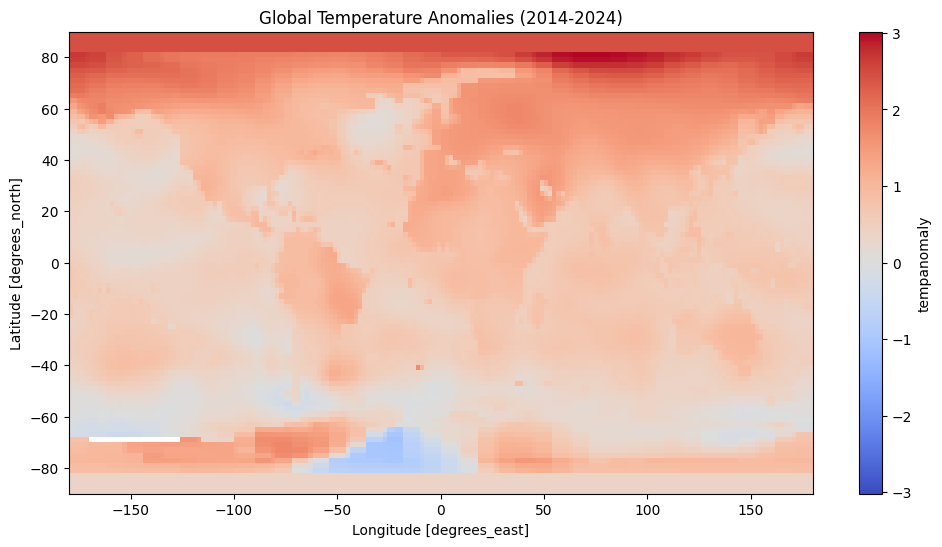

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# データの読み込み
ds = xr.open_dataset('./../../data/GISTEMP v4 data.nc')

# 過去10年間のデータを抽出
start_date = '2000-01-01'
end_date = '2020-12-31'
past_10_years = ds.sel(time=slice(start_date, end_date))

# 平均気温異常を計算
avg_temp_anomaly = past_10_years['tempanomaly'].mean(dim='time')

# プロット
plt.figure(figsize=(12, 6))
avg_temp_anomaly.plot(cmap='coolwarm')
plt.title('Global Temperature Anomalies (2014-2024)')
plt.show()

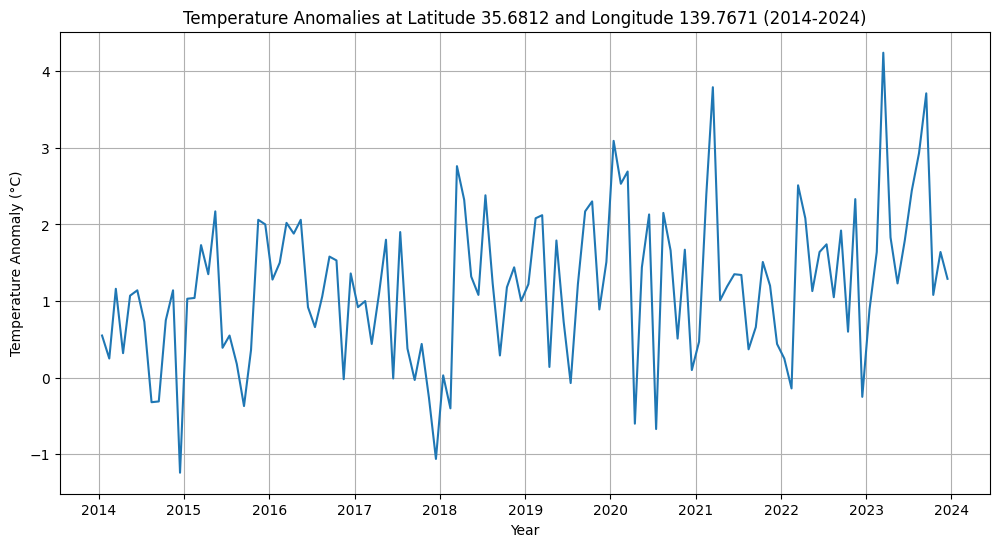

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# データの読み込み
ds = xr.open_dataset('./../../data/GISTEMP v4 data.nc')

# 過去10年間のデータを抽出
start_date = '2014-01-01'
end_date = '2024-01-01'  # 適切な日付に変更
past_10_years = ds.sel(time=slice(start_date, end_date))

# 指定する緯度経度
latitude = 35.6812  # 例: 東京の緯度
longitude = 139.7671  # 例: 東京の経度

# 緯度経度でのデータを抽出（最も近い点を選択）
temperature_anomaly_at_location = past_10_years['tempanomaly'].sel(lat=latitude, lon=longitude, method='nearest')

# 時間軸に沿ったデータをプロット
plt.figure(figsize=(12, 6))
temperature_anomaly_at_location.plot()
plt.title(f'Temperature Anomalies at Latitude {latitude} and Longitude {longitude} (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid()
plt.show()

In [30]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# NetCDFファイルのパス
nc_file_path = './../../data/CT2022 monthly flux.nc'

# NetCDFファイルを読み込む
ds = xr.open_dataset(nc_file_path)

# データセットの情報を表示
print(ds)


<xarray.Dataset> Size: 25MB
Dimensions:          (longitude: 360, latitude: 180, time: 12, components: 6)
Coordinates:
  * longitude        (longitude) float64 3kB -179.5 -178.5 ... 178.5 179.5
  * latitude         (latitude) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time             (time) datetime64[ns] 96B 2000-01-16T12:00:00 ... 2000-1...
Dimensions without coordinates: components
Data variables:
    decimal_time     (time) float64 96B ...
    time_components  (time, components) int32 288B ...
    bio_flux_opt     (time, latitude, longitude) float64 6MB ...
    ocn_flux_opt     (time, latitude, longitude) float64 6MB ...
    fossil_flux_imp  (time, latitude, longitude) float64 6MB ...
    fire_flux_imp    (time, latitude, longitude) float64 6MB ...
Attributes:
    averaging_period_length_hours:  744
    email:                          carbontracker.team@noaa.gov
    url:                            http://carbontracker.noaa.gov
    institution:                    NOAA Ear

Sorted time coordinates: ['2001-01-16T12:00:00.000000000' '2001-02-15T00:00:00.000000000'
 '2001-03-16T12:00:00.000000000' '2001-04-16T00:00:00.000000000'
 '2001-05-16T12:00:00.000000000' '2001-06-16T00:00:00.000000000'
 '2001-07-16T12:00:00.000000000' '2001-08-16T12:00:00.000000000'
 '2001-09-16T00:00:00.000000000' '2001-10-16T12:00:00.000000000'
 '2001-11-16T00:00:00.000000000' '2001-12-16T12:00:00.000000000'
 '2002-01-16T12:00:00.000000000' '2002-02-15T00:00:00.000000000'
 '2002-03-16T12:00:00.000000000' '2002-04-16T00:00:00.000000000'
 '2002-05-16T12:00:00.000000000' '2002-06-16T00:00:00.000000000'
 '2002-07-16T12:00:00.000000000' '2002-08-16T12:00:00.000000000'
 '2002-09-16T00:00:00.000000000' '2002-10-16T12:00:00.000000000'
 '2002-11-16T00:00:00.000000000' '2002-12-16T12:00:00.000000000'
 '2003-01-16T12:00:00.000000000' '2003-02-15T00:00:00.000000000'
 '2003-03-16T12:00:00.000000000' '2003-04-16T00:00:00.000000000'
 '2003-05-16T12:00:00.000000000' '2003-06-16T00:00:00.000000000'


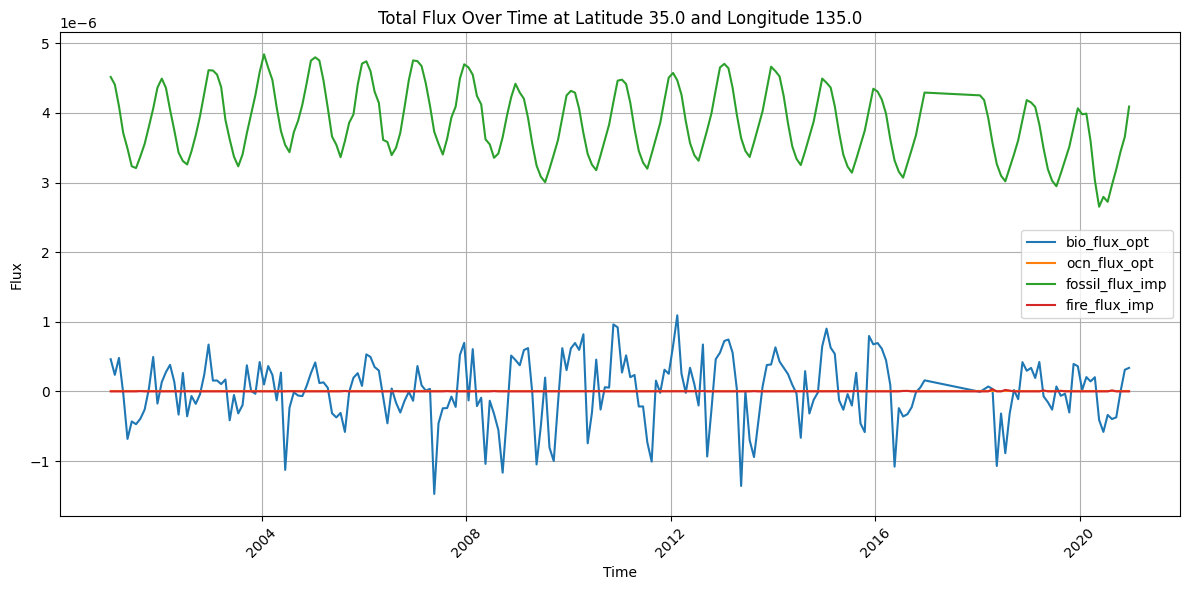

In [40]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

# データセットを読み込む
data_directory = './../../data/'

# ファイルのパターンを指定
file_list = [f for f in os.listdir(data_directory) if f.startswith('CT2022.flux1x1') and f.endswith('.nc')]

# 複数のファイルを読み込む
datasets = [xr.open_dataset(os.path.join(data_directory, f)) for f in file_list]
combined_dataset = xr.concat(datasets, dim='time')

# 時間をソート
combined_dataset = combined_dataset.sortby('time')

# 緯度経度の指定（例: 緯度35、経度135の地点を使用）
latitude_value = 35.0
longitude_value = 135.0

# 緯度経度に最も近いインデックスを取得
lat_idx = np.abs(combined_dataset['latitude'] - latitude_value).argmin().item()
lon_idx = np.abs(combined_dataset['longitude'] - longitude_value).argmin().item()

# 時間のインデックスを取得（2000年から2020年のデータを選択）
start_time = '2000-01-01'
end_time = '2020-12-31'

# 時間座標がソートされたことを確認
print("Sorted time coordinates:", combined_dataset['time'].values)

# 緯度経度のデータを抽出
flux_data = {
    'bio_flux_opt': combined_dataset['bio_flux_opt'].isel(latitude=lat_idx, longitude=lon_idx).sel(time=slice(start_time, end_time)).values,
    'ocn_flux_opt': combined_dataset['ocn_flux_opt'].isel(latitude=lat_idx, longitude=lon_idx).sel(time=slice(start_time, end_time)).values,
    'fossil_flux_imp': combined_dataset['fossil_flux_imp'].isel(latitude=lat_idx, longitude=lon_idx).sel(time=slice(start_time, end_time)).values,
    'fire_flux_imp': combined_dataset['fire_flux_imp'].isel(latitude=lat_idx, longitude=lon_idx).sel(time=slice(start_time, end_time)).values,
}

# 折れ線グラフをプロット
plt.figure(figsize=(12, 6))
for var, data in flux_data.items():
    plt.plot(combined_dataset['time'].sel(time=slice(start_time, end_time)).values, data, label=var)

plt.xlabel('Time')
plt.ylabel('Flux')
plt.title(f'Total Flux Over Time at Latitude {latitude_value} and Longitude {longitude_value}')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# グラフを表示
plt.show()

Size of temperature anomaly data: 84
Size of fossil flux data: 72
Size of bio flux data: 72
トリミング後の化石燃料フラックスデータサイズ: 72


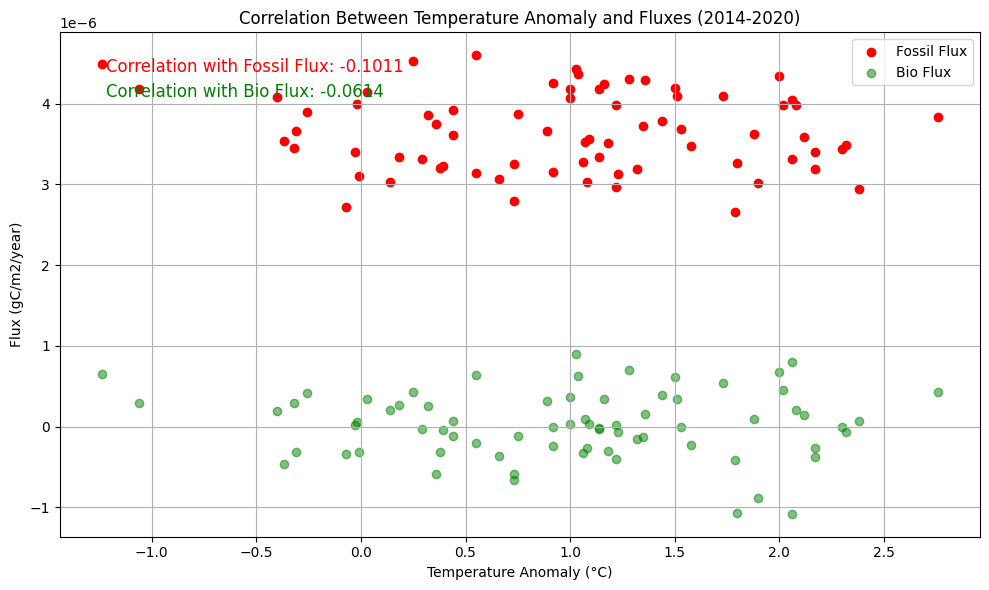

In [48]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

# GISTEMPデータの読み込み
ds = xr.open_dataset('./../../data/GISTEMP v4 data.nc')

# 過去10年間のデータを抽出
start_date = '2014-01-01'
end_date = '2024-01-01'  
past_10_years = ds.sel(time=slice(start_date, end_date))

# 指定する緯度経度
latitude = 35.6812  
longitude = 139.7671  

# 緯度経度での温度異常データを抽出（最も近い点を選択）
temperature_anomaly_at_location = past_10_years['tempanomaly'].sel(lat=latitude, lon=longitude, method='nearest')

# フラックスデータの読み込み
data_directory = './../../data/'

# ファイルのパターンを指定
file_list = [f for f in os.listdir(data_directory) if f.startswith('CT2022.flux1x1') and f.endswith('.nc')]

# 複数のファイルを読み込む
datasets = [xr.open_dataset(os.path.join(data_directory, f)) for f in file_list]
combined_dataset = xr.concat(datasets, dim='time')

# 時間をソート
combined_dataset = combined_dataset.sortby('time')

# 緯度経度の指定
latitude_value = 35.0
longitude_value = 135.0

# 緯度経度に最も近いインデックスを取得
lat_idx = np.abs(combined_dataset['latitude'] - latitude_value).argmin().item()
lon_idx = np.abs(combined_dataset['longitude'] - longitude_value).argmin().item()

# 時間のインデックスを取得（フラックスデータの時間範囲）
start_time = '2014-01-01'
end_time = '2020-12-31'

# 緯度経度のデータを抽出
flux_data = {
    'bio_flux_opt': combined_dataset['bio_flux_opt'].isel(latitude=lat_idx, longitude=lon_idx).sel(time=slice(start_time, end_time)).values,
    'fossil_flux_imp': combined_dataset['fossil_flux_imp'].isel(latitude=lat_idx, longitude=lon_idx).sel(time=slice(start_time, end_time)).values,
}

# フラックスデータの時間軸
time_values = combined_dataset['time'].sel(time=slice(start_time, end_time)).values

# 温度異常データを指定した期間に合わせる
temperature_anomaly_trimmed = temperature_anomaly_at_location.sel(time=slice(start_time, end_time)).values

# サイズを確認
print(f"Size of temperature anomaly data: {temperature_anomaly_trimmed.size}")
print(f"Size of fossil flux data: {flux_data['fossil_flux_imp'].size}")
print(f"Size of bio flux data: {flux_data['bio_flux_opt'].size}")

# サイズが一致しない場合、データをトリミング
if temperature_anomaly_trimmed.size != flux_data['fossil_flux_imp'].size:
    min_size = min(temperature_anomaly_trimmed.size, flux_data['fossil_flux_imp'].size)
    temperature_anomaly_trimmed = temperature_anomaly_trimmed[:min_size]
    flux_data['fossil_flux_imp'] = flux_data['fossil_flux_imp'][:min_size]
    print("トリミング後の化石燃料フラックスデータサイズ:", flux_data['fossil_flux_imp'].size)

if temperature_anomaly_trimmed.size != flux_data['bio_flux_opt'].size:
    min_size = min(temperature_anomaly_trimmed.size, flux_data['bio_flux_opt'].size)
    temperature_anomaly_trimmed = temperature_anomaly_trimmed[:min_size]
    flux_data['bio_flux_opt'] = flux_data['bio_flux_opt'][:min_size]
    print("トリミング後の生物フラックスデータサイズ:", flux_data['bio_flux_opt'].size)

# 散布図での相関をプロット
plt.figure(figsize=(10, 6))
plt.scatter(temperature_anomaly_trimmed, flux_data['fossil_flux_imp'], color='red', label='Fossil Flux')
plt.scatter(temperature_anomaly_trimmed, flux_data['bio_flux_opt'], color='green', label='Bio Flux', alpha=0.5)
plt.title('Correlation Between Temperature Anomaly and Fluxes (2014-2020)')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Flux (gC/m2/year)')
plt.legend()
plt.grid()

# 相関を計算
correlation_fossil = np.corrcoef(temperature_anomaly_trimmed, flux_data['fossil_flux_imp'])[0, 1]
correlation_bio = np.corrcoef(temperature_anomaly_trimmed, flux_data['bio_flux_opt'])[0, 1]

# 相関係数を図中に追加
plt.text(0.05, 0.95, f'Correlation with Fossil Flux: {correlation_fossil:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='red')
plt.text(0.05, 0.90, f'Correlation with Bio Flux: {correlation_bio:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='green')

# グラフを表示
plt.tight_layout()
plt.show()